Credit Card Fraud Detection

#Importing Required Libraries

In [65]:
import numpy as np      # Importing NumPy library for numerical operations
import pandas as pd     # Importing Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt      # Importing Matplotlib for data visualization
import seaborn as sns   # Importing Seaborn for statistical data visualization
from imblearn.over_sampling import SMOTE     # Importing SMOTE for handling imbalanced datasets
from collections import Counter   # Importing Counter for counting occurrences in arrays
from sklearn.model_selection import train_test_split   # Importing train_test_split for splitting the dataset
from sklearn.linear_model import LogisticRegression    #Importing Logistic Regression for modeling
from tabulate import tabulate   # Importing tabulate for creating tables

#Data Pre-Processing

## Import the Dataset

In [66]:
credit_card = pd.read_csv("creditcard.csv")  # Import the Dataset

##Exploratory Data Analysis

In [67]:
# Print the number of rows and columns in the dataset
rows, columns = credit_card.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 284807
Number of Columns: 31


In [68]:
credit_card.head() # Display the first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
credit_card.tail() # Display the last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [70]:
credit_card.info()  # Display information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [71]:
credit_card.isnull().sum()  # Check for missing values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [72]:
credit_card.duplicated().any()  # Check for duplicated rows in the dataset

True

In [73]:
credit_card.duplicated().sum()  # Count the number of duplicated rows in the dataset

1081

In [74]:
#Remove Duplication
data = credit_card.drop_duplicates()

In [75]:
data.duplicated().any()  # Check if there are still duplicated rows in the cleaned dataset

False

In [76]:
data.shape  # Display the shape of the cleaned dataset

(283726, 31)

In [77]:
data.columns  # Display the column names of the cleaned dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [78]:
# Count the number of fraud and legitimate transactions
fraud,legitimate = data['Class'].value_counts()
print("Number of Fraud Transactions: ", fraud)
print("Number of legitimate Transactions: ", legitimate)

Number of Fraud Transactions:  283253
Number of legitimate Transactions:  473


So this is a imbalance dataset

In [79]:
# Separate fraud and legitimate data
fraud_data = data[data['Class']==0]
legitimate_data = data[data['Class']==1]

In [80]:
fraud_data.shape # Display the shape of fraud dataset

(283253, 31)

In [81]:
legitimate_data.shape  # Display the shape of legitimate dataset

(473, 31)

In [82]:
data.describe()   # Display descriptive statistics of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#Spliting the dataset based on the target variable

In [83]:
# Split the dataset based on the target variable
X = data.drop('Class',axis = 1)
Y = data['Class']

# Handling the Imbalance Dataset

 Handling imbalanced data is a crucial aspect of machine learning, as many real-world datasets often have significant class imbalances. Resampling techniques are commonly used to address this issue.It consists of removing       samples from the majority class (under-sampling) or adding more examples from the minority class (over-sampling).

Popular resampling techniques,
Random Under-Sampling
Random Over-Sampling
Resampling techniques using the Python library imbalanced-learn.
Random Under-Sampling With Imblearn
Random Over-Sampling With imblearn
Synthetic Minority Oversampling Technique (SMOTE)
Synthetic Minority Under-Sampling Technique (SMOTE)
I handle imbalanced data using Synthetic Minority Oversampling Technique (SMOTE)

In [84]:
# SMOTE algorithm works in 4 simple steps:
# 1- Choose a minority class as the input vector.
# 2- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
# 3- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
# 4- Repeat the steps until the data is balanced

In [85]:
# Display the shape of features and target variable
X.shape

(283726, 30)

In [86]:
Y.shape

(283726,)

In [87]:
X.isnull().sum()  # Check for missing values in the features

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [88]:
Y.isnull().sum()  #To check for Null Values in Target Variable

0

In [89]:
#df = pd.DataFrame(data)
X = X.dropna(subset=['V23','V24','V25','V26','V27','V28'])

In [90]:
X.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [91]:
Y = Y.dropna()

In [92]:
Y.isnull().sum()

0

In [93]:
# We can assign a random state for reproductibility
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X, Y)

In [94]:
x_smote.shape

(566506, 30)

In [95]:
y_smote.shape

(566506,)

In [96]:
y_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [97]:
# Print the original and resampled dataset shapes
print("The Original Shape of Target dataset: ", Counter(Y))
print("The Resampled dataset Shape of Target dataset: ", Counter(y_smote))

The Original Shape of Target dataset:  Counter({0: 283253, 1: 473})
The Resampled dataset Shape of Target dataset:  Counter({0: 283253, 1: 283253})


#Split the Dataset into Training & Test Dataset

In [98]:
# Split the dataset into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [99]:
X_train.shape

(453204, 30)

In [100]:
X_test.shape

(113302, 30)

In [101]:
Y_train.shape

(453204,)

In [102]:
Y_test.shape

(113302,)

#Data Visualization

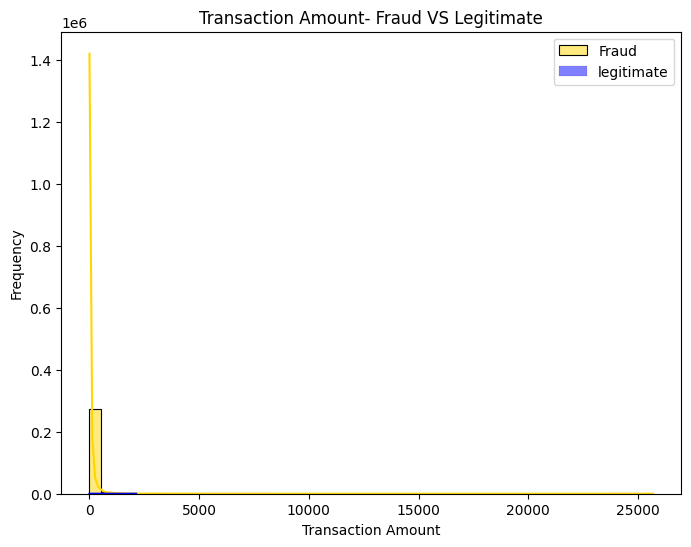

In [103]:
# Plot the histogram of transaction amounts for fraud and legitimate transactions
plt.figure(figsize =(8,6))
plt.title("Transaction Amount- Fraud VS Legitimate")
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
sns.histplot(fraud_data['Amount'], bins = 50, kde = True, color = 'gold', label = 'Fraud')
sns.histplot(legitimate_data['Amount'], bins = 50, kde = True, color = 'blue', label = 'legitimate')
plt.legend()
plt.show()

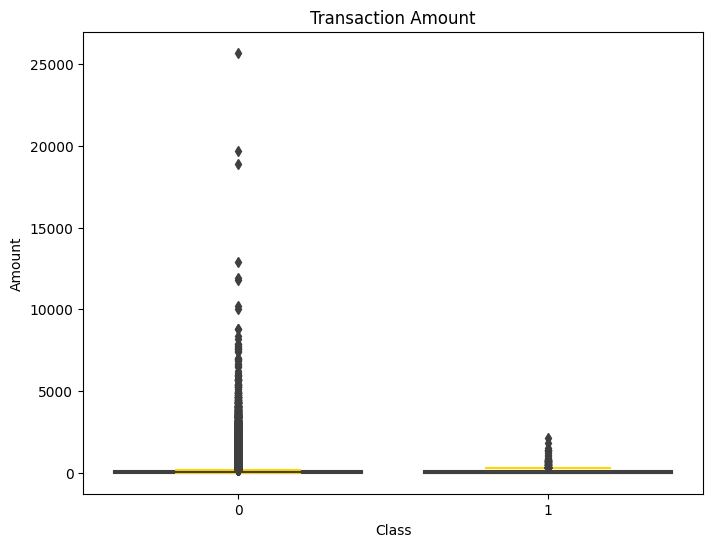

In [104]:
# Plot the boxplot of transaction amounts for fraud and legitimate transactions
plt.figure(figsize=(8,6))
plt.title('Transaction Amount')
sns.boxplot(x = 'Class', y = 'Amount', data = data, boxprops=dict(facecolor="blue"), whiskerprops=dict(color="gold"), capprops=dict(color="gold"))
plt.show()

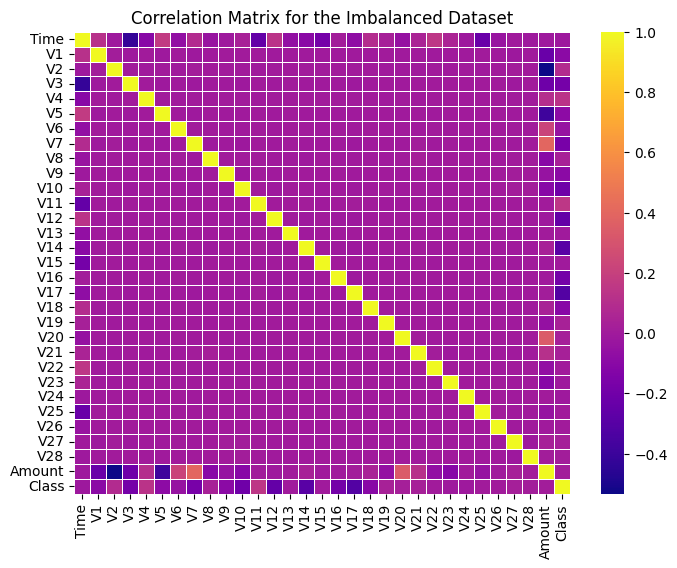

In [105]:

corr_imbalanced = data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Matrix for the Imbalanced Dataset')
sns.heatmap(corr_imbalanced, annot=False, cmap ='plasma', linewidth=0.5)
plt.show()

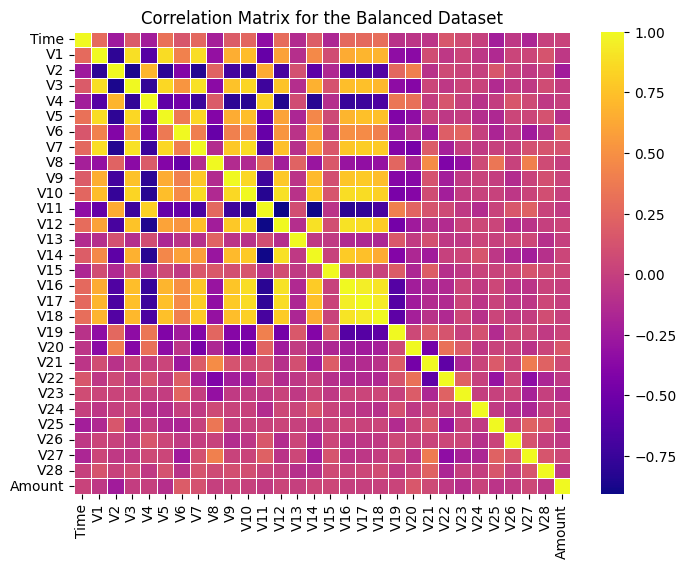

In [106]:
corr_imbalanced = x_smote.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Matrix for the Balanced Dataset')
sns.heatmap(corr_imbalanced, annot=False, cmap ='plasma', linewidth=0.5)
plt.show()

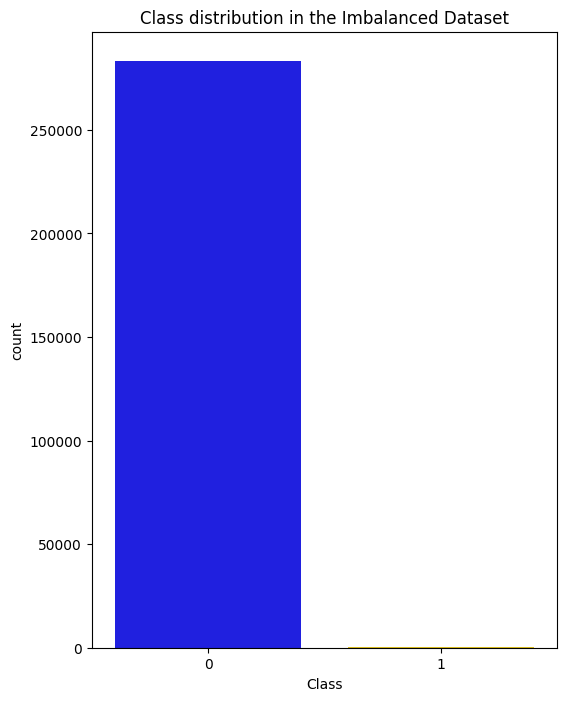

In [107]:
custom_palette = sns.color_palette(['blue', 'gold'])
plt.figure(figsize=(6,8))
plt.title('Class distribution in the Imbalanced Dataset')
sns.countplot(x="Class", data = data, palette= custom_palette)
plt.show()

In [108]:
x_smote.shape

(566506, 30)

In [109]:
x_smote.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [110]:
y_smote

0         0
1         0
2         0
3         0
4         0
         ..
566501    1
566502    1
566503    1
566504    1
566505    1
Name: Class, Length: 566506, dtype: int64

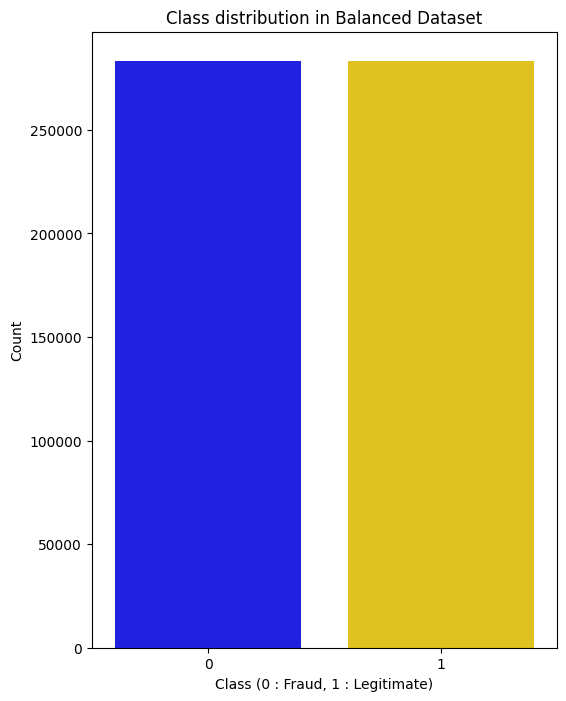

In [111]:
custom_palette = sns.color_palette(['blue', 'gold'])
plt.figure(figsize=(6,8))
plt.title('Class distribution in Balanced Dataset')
sns.countplot(x = y_smote, palette = custom_palette)
plt.xlabel('Class (0 : Fraud, 1 : Legitimate)')
plt.ylabel('Count')
plt.show()

#Model Training

In [112]:
x_smote

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,41183.445750,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,-6.040679,...,0.865194,2.101089,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,17.434148
566502,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,...,1.306372,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263
566503,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,...,0.997144,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802
566504,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,...,0.375281,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185


In [113]:
# Build the Logistic Regression Model
LR_Model = LogisticRegression(random_state = 42)

In [114]:
LR_Model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#Generating Predictions

In [115]:
#Predict Transactions as fraudulent or genuine by giving Random Sample
#We have the test Sample X_test for testing

In [116]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
554816,48422.549558,1.084606,0.690925,-0.843441,1.359081,0.168721,-0.474593,-0.332476,0.095933,-0.147360,...,-0.084172,0.030615,-0.092788,-0.163899,-0.667837,0.659944,-0.085094,0.135319,0.086631,0.956544
19821,30629.000000,-0.923736,1.108088,1.560499,-0.268841,0.075925,-0.230605,0.703012,0.024225,-0.071223,...,0.353115,-0.259255,-0.387702,0.007894,0.186998,-0.262051,0.053898,0.331941,0.015959,17.990000
184234,126440.000000,-1.431701,-1.397938,-1.991814,-2.281973,3.728501,2.114475,-0.799982,1.200862,-1.737078,...,-0.124045,-0.129716,-0.739275,-0.161992,0.695171,0.388090,0.075462,-0.123091,-0.376603,0.950000
503641,65366.690879,-3.101443,1.373930,-3.074656,3.390527,-5.665370,2.153805,-0.594211,-3.431825,-1.063649,...,-0.488884,-0.492903,-0.109470,-4.283774,0.547649,-0.955072,-0.189983,1.520310,-0.369614,1334.907329
261118,160300.000000,-1.330448,1.119757,-2.572612,1.622074,0.970933,-1.086979,0.505613,0.616914,-0.848251,...,-0.206425,0.032702,0.070120,-0.262940,-0.588721,0.233772,-0.384721,-0.089859,-0.319339,42.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194785,131084.000000,-1.713524,-1.454474,-2.085923,1.176238,-1.008929,0.349107,5.266096,-0.825448,-1.659353,...,2.067196,1.057223,1.422867,1.937434,1.042086,0.637725,-0.322987,-0.178539,0.270746,991.000000
357857,77176.622092,-1.277280,1.949499,-1.634332,1.460517,0.092862,-1.095498,-0.963573,0.904495,-1.089951,...,0.010998,0.150650,-0.450802,-0.175786,-0.296134,0.054207,-0.323501,0.289862,0.153234,25.584721
485557,155552.171157,-0.150549,2.563819,-4.471575,3.452277,-0.203731,-1.996415,-1.223127,0.394531,-2.552771,...,0.664085,0.491682,0.039420,-0.114844,-0.271377,0.395206,0.508317,0.461173,0.235929,68.070126
258811,159266.000000,2.013611,-0.267212,-0.736766,0.017024,0.151220,0.524999,-0.530068,0.125899,0.847492,...,-0.064013,-0.174973,-0.351407,0.270087,-0.155116,-0.273752,-0.626453,0.034687,-0.039486,7.490000


In [117]:
Y_test

554816    1
19821     0
184234    0
503641    1
261118    0
         ..
194785    0
357857    1
485557    1
258811    0
71821     0
Name: Class, Length: 113302, dtype: int64

In [118]:
#Prediction for Testing Data
X_test_prediction = LR_Model.predict(X_test)

In [119]:
#Prediction for Training Data
X_train_prediction = LR_Model.predict(X_train)

In [120]:
X_test_prediction

array([1, 0, 0, ..., 1, 0, 0])

In [121]:
X_train_prediction

array([1, 0, 1, ..., 1, 0, 0])

In [122]:
for i in X_test_prediction:
  if i == 0:
    print ('Genuine Transaction')
  else:
    print ('Fraud Transaction')

Streaming output truncated to the last 5000 lines.
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Fraud Transaction
Genuine Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Genuine Transaction
Genuine Transaction
Genuine Transaction
Genuine Transaction
Fraud Transaction
Genuine Transaction
Genuine

#Classification Performance Metrics
|Accuracy: Measures the proportion of correctly predicted instances out of the total instances.

|Precision: It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

|Recall(Sensitivity): It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

|F1-Score: The weighted average of precision and recall.

|ROC-AUC: AUROC represents the likelihood of your model distinguishing observations from two classes.

|Confusion Matrix: A table showing correct predictions and types of incorrect predictions.

NOTE:Accuracy is not the best metric to use when evaluating imbalanced datasets, as it can be misleading.

In [123]:
#Accuracy Score
from sklearn.metrics import accuracy_score

In [124]:
# Accuracy Score for Prediction based on Testing Data
LR_Accuracy_test_score = accuracy_score(Y_test, X_test_prediction)

In [125]:
LR_Accuracy_test_score

0.970353568339482

In [126]:
# Accuracy Score for Prediction based on Training Data
LR_Accuracy_train_score = accuracy_score(Y_train, X_train_prediction)
LR_Accuracy_train_score

0.9699230368664001

In [127]:
# Calculate Confusion Matrix, Recall Score, Precision Score & f1 score for the Logistic Regression model on Testing Data
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
confusion_matrix_LR_test = confusion_matrix(Y_test, X_test_prediction) #For Testing Data
confusion_matrix_LR_train = confusion_matrix(Y_train, X_train_prediction) #For Training Data
recall_score_lr_test = recall_score(Y_test, X_test_prediction, pos_label = 0.0)
precision_score_lr_test = precision_score(Y_test, X_test_prediction, pos_label = 0.0)
f1_score_lr_test = f1_score(Y_test, X_test_prediction, pos_label = 0.0)
print('confusion Matrix for Testing Data is: ', confusion_matrix_LR_test)
print('Precision Score for Testing Data is: ',precision_score_lr_test )
print('Recall Score for Testing Data is: ', recall_score_lr_test)
print('f1_score for Testing Data is: ', f1_score_lr_test)

confusion Matrix for Testing Data is:  [[55224  1239]
 [ 2120 54719]]
Precision Score for Testing Data is:  0.9630301339285714
Recall Score for Testing Data is:  0.9780564263322884
f1_score for Testing Data is:  0.970485119544492


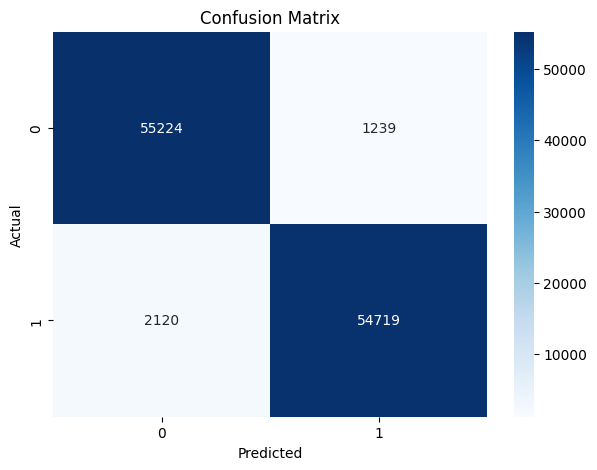

In [128]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_LR_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()